In [119]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
pitching_df = pd.read_csv("testdata/core/Pitching.csv")
salary_df = pd.read_csv("testdata/core/Salaries.csv")

# データセット準備

In [172]:
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'playerID'])
df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'lgID', 'playerID'], how='outer')
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'playerID'], how='outer')
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'lgID', 'playerID'])

In [134]:
pitching_df[['yearID','teamID','lgID','playerID']].isnull().sum()

yearID        0
teamID        0
lgID        131
playerID      0
dtype: int64

In [135]:
salary_df[['yearID','teamID','lgID','playerID']].isnull().sum()

yearID      0
teamID      0
lgID        0
playerID    0
dtype: int64

In [173]:
df.count()

playerID    59597
yearID      59597
stint       44963
teamID      59597
lgID        59466
W           44963
L           44963
G           44963
GS          44963
CG          44963
SHO         44963
SV          44963
IPouts      44963
H           44963
ER          44963
HR          44963
BB          44963
SO          44963
BAOpp       43437
ERA         44874
IBB         30388
WP          44830
HBP         44405
BK          44963
BFP         44724
GF          44830
R           44963
SH          12063
SF          12063
GIDP        12061
salary      26431
dtype: int64

In [174]:
df['salary'].isnull().sum()

33166

In [161]:
#how='inner'
#salary      11797
#how='outer'
#salary      26431   =====>母数が多い方が良い。
#how='inner' minus lgID
#salary      11799

In [188]:
df_sal_nonan = df.dropna(subset=["salary"]).reset_index(drop=True)

In [190]:
df_sal_nonan.isnull().sum()
#df_sal_nonan

playerID        0
yearID          0
stint       14634
teamID          0
lgID            0
W           14634
L           14634
G           14634
GS          14634
CG          14634
SHO         14634
SV          14634
IPouts      14634
H           14634
ER          14634
HR          14634
BB          14634
SO          14634
BAOpp       15095
ERA         14639
IBB         14634
WP          14634
HBP         14634
BK          14634
BFP         14634
GF          14634
R           14634
SH          19950
SF          19950
GIDP        19950
salary          0
dtype: int64

# データのチェック

In [197]:
df_sal_nonan.iloc[:3,:20]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA
0,ackerji01,1985,1.0,TOR,AL,7.0,2.0,61.0,0.0,0.0,0.0,10.0,259.0,86.0,31.0,7.0,43.0,42.0,0.26,3.23
1,agostju01,1985,1.0,CHA,AL,4.0,3.0,54.0,0.0,0.0,0.0,1.0,181.0,45.0,24.0,3.0,23.0,39.0,0.21,3.58
2,alexado01,1985,1.0,TOR,AL,17.0,10.0,36.0,36.0,6.0,1.0,0.0,782.0,268.0,100.0,28.0,67.0,142.0,0.26,3.45


In [198]:
df_sal_nonan.iloc[:3,21:28]

,WP,HBP,BK,BFP,GF,R,SH
0,2.0,3.0,0.0,370.0,26.0,35.0,NaN
1,0.0,3.0,0.0,246.0,21.0,27.0,NaN
2,9.0,6.0,0.0,1090.0,0.0,105.0,NaN


In [176]:
pitching_df.iloc[:,:13].describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000


In [177]:
pitching_df.iloc[:,14:23].describe()

,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP
count,44963.000000,44963.000000,44963.000000,44963.000000,43437.000000,44874.000000,30388.000000,44830.000000,44405.000000
mean,36.103863,6.434201,29.905300,46.500856,0.319920,5.073269,2.411379,2.528575,2.266096
std,33.431186,6.988237,28.172268,49.345046,0.710482,5.318781,2.772648,3.425706,2.998881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,8.000000,8.000000,0.236000,3.150000,0.000000,0.000000,0.000000
50%,25.000000,4.000000,21.000000,31.000000,0.260000,4.140000,2.000000,1.000000,1.000000
75%,58.000000,9.000000,45.000000,68.000000,0.298000,5.510000,4.000000,4.000000,3.000000
max,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,63.000000,41.000000


In [178]:
pitching_df.iloc[:,24:28].describe()

,BFP,GF,R,SH
count,44724.000000,44830.000000,44963.000000,12063.000000
mean,343.312181,6.345260,43.021773,2.141922
std,348.758261,9.993949,43.245812,2.710191
min,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000000,11.000000,0.000000
50%,227.000000,3.000000,28.000000,1.000000
75%,535.000000,8.000000,67.000000,3.000000
max,2906.000000,84.000000,519.000000,21.000000


In [9]:
pitching_df.describe(include=['O'])

,playerID,teamID,lgID
count,44963,44963,44832
unique,9302,149,6
top,newsobo01,PHI,NL
freq,29,2117,22823


In [179]:
pitching_df.lgID.unique()

array([nan, 'NL', 'AA', 'UA', 'PL', 'AL', 'FL'], dtype=object)

In [180]:
pitching_df.loc[:,"lgID"].isnull().any(1)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [10]:

salary_df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [11]:
salary_df.describe(include=['O'])

,teamID,lgID,playerID
count,26428,26428,26428
unique,46,2,5155
top,CLE,NL,moyerja01
freq,949,13469,25


In [12]:
pitching_df.count()

playerID    44963
yearID      44963
stint       44963
teamID      44963
lgID        44832
W           44963
L           44963
G           44963
GS          44963
CG          44963
SHO         44963
SV          44963
IPouts      44963
H           44963
ER          44963
HR          44963
BB          44963
SO          44963
BAOpp       43437
ERA         44874
IBB         30388
WP          44830
HBP         44405
BK          44963
BFP         44724
GF          44830
R           44963
SH          12063
SF          12063
GIDP        12061
dtype: int64

In [13]:
salary_df.count()

yearID      26428
teamID      26428
lgID        26428
playerID    26428
salary      26428
dtype: int64

In [15]:
df.count()

playerID    11797
yearID      11797
stint       11797
teamID      11797
lgID        11797
W           11797
L           11797
G           11797
GS          11797
CG          11797
SHO         11797
SV          11797
IPouts      11797
H           11797
ER          11797
HR          11797
BB          11797
SO          11797
BAOpp       11336
ERA         11792
IBB         11797
WP          11797
HBP         11797
BK          11797
BFP         11797
GF          11797
R           11797
SH           6481
SF           6481
GIDP         6481
salary      11797
dtype: int64

In [16]:
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,2.0,3.0,0,370.0,26.0,35,NaN,NaN,NaN,170000
1,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0.0,3.0,0,246.0,21.0,27,NaN,NaN,NaN,147500
2,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,9.0,6.0,0,1090.0,0.0,105,NaN,NaN,NaN,875000
3,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1.0,1.0,1,135.0,13.0,22,NaN,NaN,NaN,750000
4,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1.0,3.0,1,318.0,19.0,41,NaN,NaN,NaN,250500


In [17]:
df.isnull().any()

playerID    False
yearID      False
stint       False
teamID      False
lgID        False
W           False
L           False
G           False
GS          False
CG          False
SHO         False
SV          False
IPouts      False
H           False
ER          False
HR          False
BB          False
SO          False
BAOpp        True
ERA          True
IBB         False
WP          False
HBP         False
BK          False
BFP         False
GF          False
R           False
SH           True
SF           True
GIDP         True
salary      False
dtype: bool

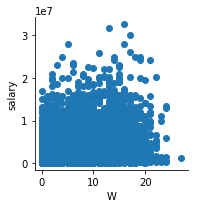

In [41]:
g = sns.FacetGrid(df,size=3)
g = g.map(plt.scatter, "W", "salary")

# American
g = sns.FacetGrid(df[df["lgID"].str.contains("AL")],col="yearID",hue="teamID",col_wrap=5,size=2.2)
g = g.map(plt.scatter, "W", "salary")
g.add_legend()

# National
g = sns.FacetGrid(df[df["lgID"].str.contains("NL")],col="yearID",hue="teamID",col_wrap=5,size=2.2)
g = g.map(plt.scatter, "W", "salary")
g.add_legend()